In [1]:
!pip install -Uqq fastai gradio

In [2]:
from fastai.vision.all import *

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
path = os.path.abspath("/kaggle/input/utkface-new/UTKFace")
len(os.listdir(path))

23708

In [4]:
# example filename: 100_0_0_20170112213500903.jpg.chip.jpg
def get_float_labels(path):
    return float(path.name.split('_')[0])

In [5]:
dls = DataBlock(
    blocks=(ImageBlock, RegressionBlock), 
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=get_float_labels,
    item_tfms=[Resize(200, method='squish')]
).dataloaders(path)

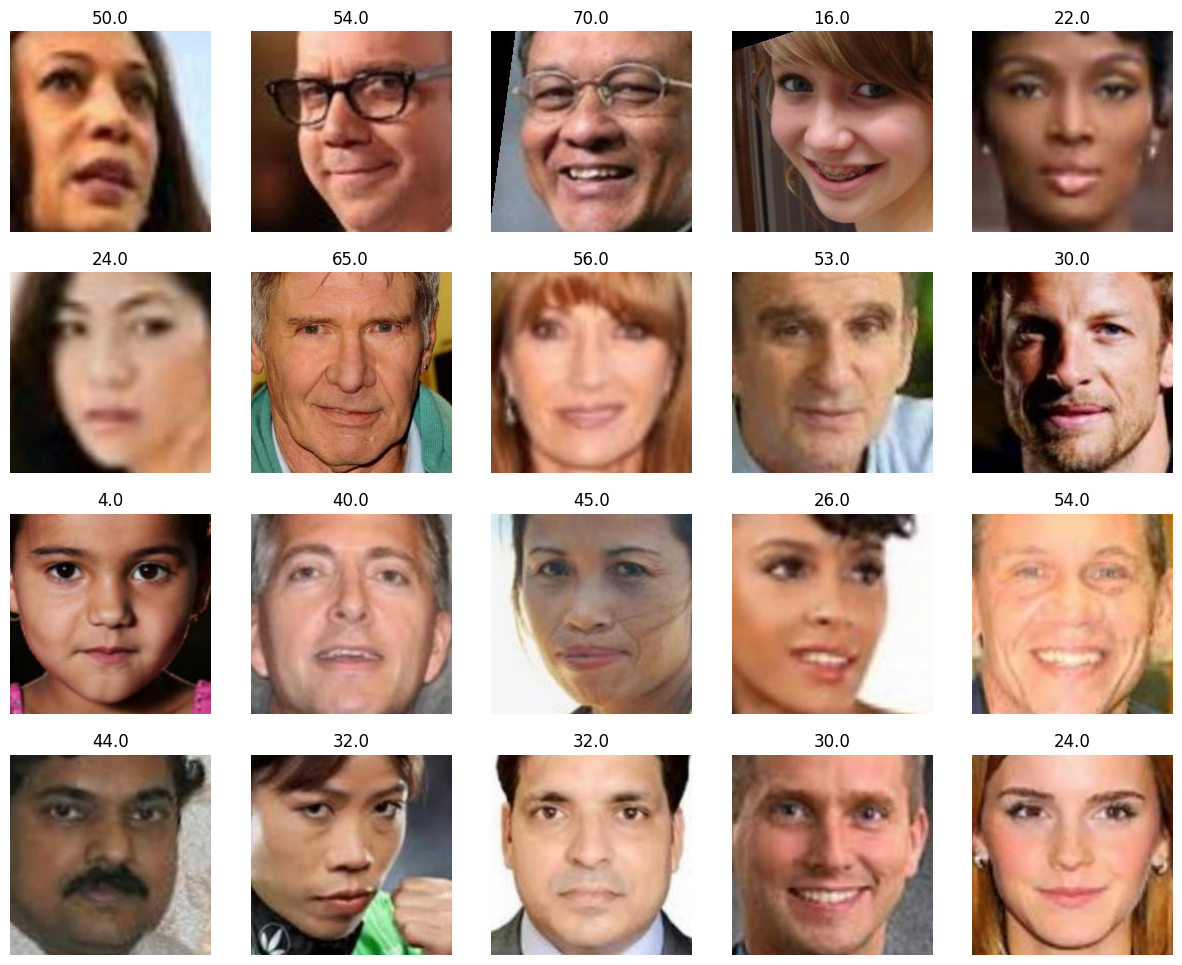

In [6]:
dls.show_batch(max_n=20)

In [18]:
learn = vision_learner(dls, resnet50, metrics=[mse, mae])

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [19]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [16]:
# learn.loss = L1LossFlat

SuggestedLRs(valley=0.009120108559727669)

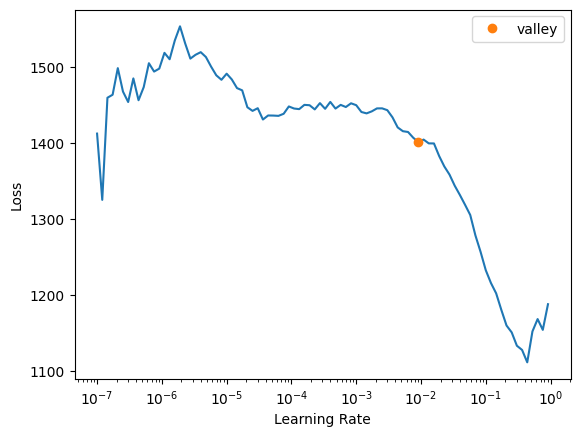

In [20]:
learn.lr_find()

In [21]:
learn.fine_tune(3, 0.004365158267319202)

epoch,train_loss,valid_loss,mse,mae,time
0,228.230530,123.884033,123.884033,8.256377,03:10


epoch,train_loss,valid_loss,mse,mae,time
0,101.104004,70.753586,70.753586,6.127224,04:10
1,81.965675,74.900368,74.900368,6.366639,04:17
2,67.296768,62.821663,62.821663,5.575334,04:09
3,61.461994,70.004662,70.004662,5.917445,04:04
4,44.963291,56.786476,56.786476,5.381704,03:58
5,34.348495,53.839394,53.839394,5.123424,04:03
6,25.776003,49.207672,49.207672,4.926849,04:04
7,23.345095,48.912968,48.912968,4.874643,04:04
8,20.029367,47.909069,47.909069,4.766599,03:58
9,17.178350,47.397976,47.397976,4.790153,04:04


In [22]:
learn.export('model_new_lr_3epochs.pkl')

In [23]:
learn.predict("/kaggle/input/utkface-new/UTKFace/100_0_0_20170112213500903.jpg.chip.jpg")

((100.99205780029297,), tensor([100.9921]), tensor([100.9921]))

In [24]:
learn.predict("/kaggle/input/utkface-new/UTKFace/10_0_0_20170103233459275.jpg.chip.jpg")

((11.7036771774292,), tensor([11.7037]), tensor([11.7037]))

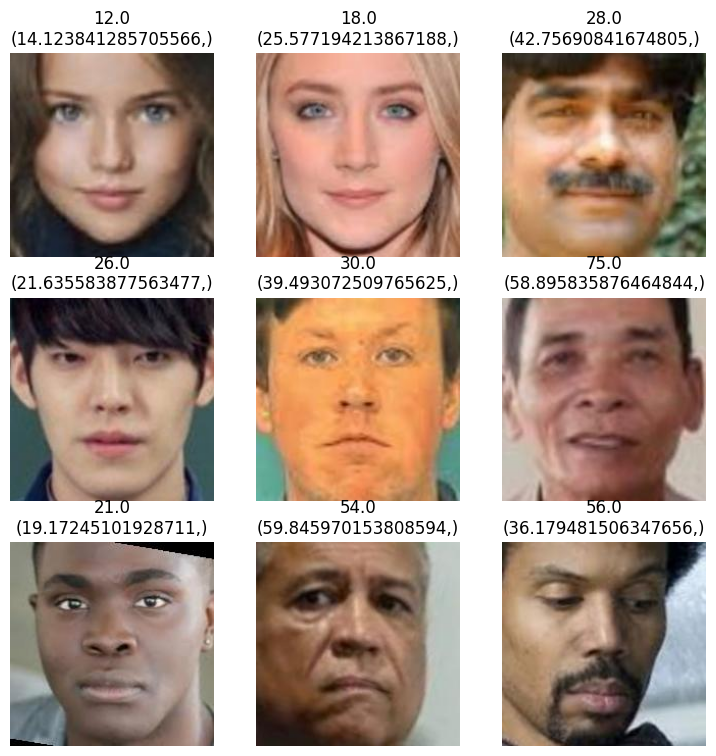

In [25]:
learn.show_results()

## Archive

In [38]:
def get_float_category(filename):
    age = int(filename.split('_')[0])
    # Calculate the starting and ending values for each bucket
    for start in range(0, 101, 5):
        end = start + 5
        bucket = f"{start}-{end}"

        # Check if the number falls within the current bucket's range
        if start <= age <= end:
            return bucket

In [ ]:
dls = ImageDataLoaders.from_name_func(path, get_image_files(path),
        valid_pct=0.2,
        seed=42,
        bs=16,
        label_func=get_float_labels,
        item_tfms=Resize(224))